In [29]:
def stringToList(input):
    lst = []
    for i in input:
        # Extract values within the square brackets and split by ","
        values_str = i[i.find('[')+1:i.find(']')].split(',')
        
        # Convert to float
        values = list(map(float, values_str))
        lst.append(values)
    return lst

In [30]:
def moodNamePrintFromLabel(n):
  if n == 0: result = 'Angry '
  elif n == 1: result = 'Disgust '
  elif n == 2: result = 'Fear'
  elif n == 3: result = 'Happy'
  elif n == 4: result = 'Sad'
  elif n == 5: result = 'Surprise'
  elif n == 6: result = 'Neutral'
  return result



In [31]:
import pandas as pd
import numpy as np

In [32]:

data = pd.read_csv('D:\Music-recommendation-based-on-facial-emotion-recognition-main (1)\Music-recommendation-based-on-facial-emotion-recognition-main\Image_data\\train.csv')
test_data = pd.read_csv('D:\Music-recommendation-based-on-facial-emotion-recognition-main (1)\Music-recommendation-based-on-facial-emotion-recognition-main\Image_data\\test.csv')

**processing the data**

In [33]:
X = data['pixels']
Y = np.array(data['emotion'])

x_test_data = np.array(test_data['pixels'])

X = np.array(stringToList(X))/255.0

X = np.reshape(X, (len(X), 48, 48, 1))  # Adjusted the reshape size to len(X)

#x_test_data = np.array(stringToList(x_test_data))
x_test_data = np.array(stringToList(x_test_data))/255.0
x_test_data = np.reshape(x_test_data, (len(x_test_data), 48, 48, 1))  # Adjusted the reshape size to len(x_test_data)


In [34]:
print(X.shape)
print(Y.shape)

(16804, 48, 48, 1)
(16804,)


**data splitting to test and training set**

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [9]:
print(x_train.shape)
print(y_train.shape)

(13443, 48, 48, 1)
(13443,)


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization

In [12]:
model = Sequential()
#1st convo
model.add(Conv2D(96, (3,3), input_shape = (48,48,1)))
model.add(Activation('relu'))
#polling
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())


#2nd convo
model.add(Conv2D(256, (3,3)))
model.add(Activation('relu'))
#polling
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

#3rd convo
model.add(Conv2D(384, (3,3)))
model.add(Activation('relu'))
#polling
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

#4th convo
model.add(Conv2D(256, (3,3)))
model.add(Activation('relu'))
#polling
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())




#passing through dense layer
model.add(Flatten())

#1st dense layer
model.add(Dense(1024))
model.add(Activation('relu'))
#dropout
model.add(BatchNormalization())
model.add(Dropout(0.4))


#2nd dense layer
model.add(Dense(1024))
model.add(Activation('relu'))
#dropout
model.add(BatchNormalization())
model.add(Dropout(0.4))


#3rd dense layer
model.add(Dense(256))
model.add(Activation('relu'))
#dropout
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Activation('relu'))


#output layer
model.add(Dense(7))
model.add(Activation('softmax'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ['sparse_categorical_accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.1)




Epoch 1/10


251/379 [==================>...........] - ETA: 21s - loss: 1.6093 - sparse_categorical_accuracy: 0.3142

KeyboardInterrupt: 

In [27]:
model.save('D:\\Music-recommendation-based-on-facial-emotion-recognition-main (1)\\Music-recommendation-based-on-facial-emotion-recognition-main\\Image_data\\model.h5')

D:\Anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Loading the saved mood detection model from google drive**

In [42]:
from keras.models import load_model
loaded_model = load_model('D:\\Music-recommendation-based-on-facial-emotion-recognition-main (1)\\Music-recommendation-based-on-facial-emotion-recognition-main\\Image_data\\model.h5')

In [14]:
score = loaded_model.evaluate(x_test, y_test, verbose=1)

106/106 [==============================] - 5s 45ms/step - loss: 0.5622 - sparse_categorical_accuracy: 0.8021


In [43]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from imutils.video import VideoStream
import numpy as np
import imutils
import time
import cv2
import os

In [45]:
import cv2
import numpy as np

# ... (rest of your imports)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


def moodNamePrintFromLabel(n):
    emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    return emotions[n]

# ... (rest of your code)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


video_cap = cv2.VideoCapture(0)  # Open the webcam

while (video_cap.isOpened()):
    ret, frame = video_cap.read()

    if not ret:
        print("Failed to capture frame")
        break

    gray_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)

    for (x, y, w, h) in faces:
        pxl_lst = []
        for i in range(y, y + h):
            lst = []
            for j in range(x, x + w):
                lst.append(gray_img[i][j])
            pxl_lst.append(lst)
        single_face = np.array(pxl_lst)

        resized_img = cv2.resize(single_face, (48, 48), interpolation=cv2.INTER_AREA)
        resized_img = np.reshape(resized_img, (1, 48, 48, 1)) / 255.0

        # Get the result from the model
        result = np.argmax(loaded_model.predict(resized_img), axis=-1)

        # Draw a rectangle around the face and display the mood label
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(frame, moodNamePrintFromLabel(result[0]), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display the frame with mood information
    cv2.imshow('Webcam Mood Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close the window
video_cap.release()
cv2.destroyAllWindows()
# Call the function
#videoToMoodDetection()


1/1 [==============================] - 0s 31ms/step


**Taking input as image and videos and detecting faces and getting the face portion. Then passing these faces to the model and getting the mood detection output.**

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def imageToMoodDetection(img_path):
    img = cv2.imread(img_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_img, 1.3, 3)

    for (x, y, w, h) in faces:
        pxl_lst = []
        for i in range(y, y + h):
            lst = []
            for j in range(x, x + w):
                lst.append(gray_img[i][j])
            pxl_lst.append(lst)
        single_face = np.array(pxl_lst)
        single_face = np.reshape(single_face, (h, w,))

        resized_img = cv2.resize(single_face, (48, 48), interpolation=cv2.INTER_AREA)
        resized_img = np.reshape(resized_img, (1, 48, 48, 1)) / 255.0

        # Display the resized image using matplotlib
        plt.imshow(resized_img[0, :, :, 0], cmap='gray')
        plt.axis('off')
        plt.show()

        print("Resized Image Shape:", resized_img.shape)

        result = np.argmax(loaded_model.predict(resized_img), axis=-1)
        print("Predicted Mood:", moodNamePrintFromLabel(result))

# Call the function with the image path
imageToMoodDetection('D:\\Music-recommendation-based-on-facial-emotion-recognition-main (1)\\Music-recommendation-based-on-facial-emotion-recognition-main\\Image_data\\test\\disgusted\\im1.png')




In [47]:
imageToMoodDetection('D:\\Music-recommendation-based-on-facial-emotion-recognition-main (1)\\Music-recommendation-based-on-facial-emotion-recognition-main\\Image_data\\test\\disgusted\\im1.png')

**pixel to image**

(48, 48, 1)
(48, 48)


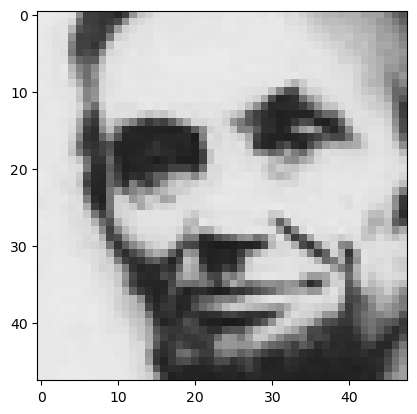

In [35]:
import matplotlib.pyplot as plt

single_image = np.array(x_test_data[13]*255)
print(single_image.shape)
single_image = np.reshape(single_image,(48,48),order = 'C')
print(single_image.shape)
plt.imshow(single_image, cmap='gray', vmin=0, vmax=255)
# s_img = np.array(single_image, shape=(48,48))